In [1]:
# Take care of matplotlib and grab Python packages
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
# Grab the oscars stuff we need
import oscars.sr
import oscars.plots_mpl as plots
import oscars.field_opt as field

OSCARS v2.0.2 - Open Source Code for Advanced Radiation Simulation
Brookhaven National Laboratory, Upton NY, USA
http://oscars.bnl.gov
oscars@bnl.gov


In [3]:
# Create our SR object
osr = oscars.sr.sr()

In [4]:
# Add a B field
osr.clear_bfields()
#a =field.ideal_undulator(osr=osr, 
#                         field=0.500, 
#                         length=2, 
#                         period=0.1, 
#                         pieces=4, 
#                         height=0.1, 
#                         gap=0.01, 
#                         packing=0.99, 
#                         t_distance=1.2, 
#                         t_width=0.3, 
#                         t_field=0.05)

#osr.clear_bfields()
# Add an undulator B-field
osr.add_bfield_undulator([0, 0.5, 0], [0, 0, 0.1], 20)
# Add a smudge in the field
#osr.add_bfield_gaussian(bfield=[0, 0.00001, 0], 
#                        sigma=[0, 0.000005, 0], 
#                        translation=[0, 0, -0.25])

In [5]:
# Record some info about terminating magnets
b_field = 0.500 # Max undulator field
t_distance = 1.2 # Distance from origin to terminating magnets
t_width = 0.3 # Width of terminating magnets
t_field = 0.5 # Max terminating field
sr_info = [b_field, t_distance, t_width, t_field]

In [6]:
# Set particle beam and start/stop times
osr.clear_particle_beams()
osr.set_particle_beam(type='electron', name='test-beam', 
                      x0=[0, 0, -5], d0=[0, 0, 1], t0=-5,
                      energy_GeV=3, current = 0.500)
osr.set_ctstartstop(-5,5)

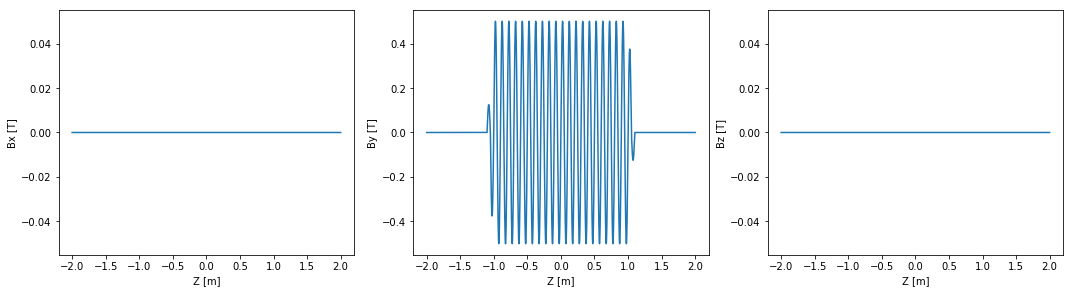

In [7]:
# Plot field before optimzation
plots.plot_bfield(osr, mymin=-2, mymax=2) #, ofile='field-uncorrected.svg')


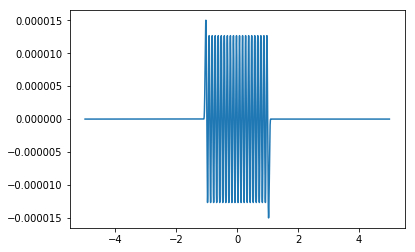

In [8]:
trajectory = osr.calculate_trajectory()
X = [item[1][0] for item in trajectory]
Y = [item[1][1] for item in trajectory]
Z = [item[1][2] for item in trajectory]
plt.figure(1)
plt.plot(Z, X)
#plt.savefig('trajectory-uncorrected.svg', bbox_inches='tight')
plt.show()

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 3.5427080595978105e-05
            Iterations: 2
            Function evaluations: 25
            Gradient evaluations: 2

Solution array: [ -1.07612521e-08  -6.08318949e-09  -5.08863619e-08  -4.54865025e-08]


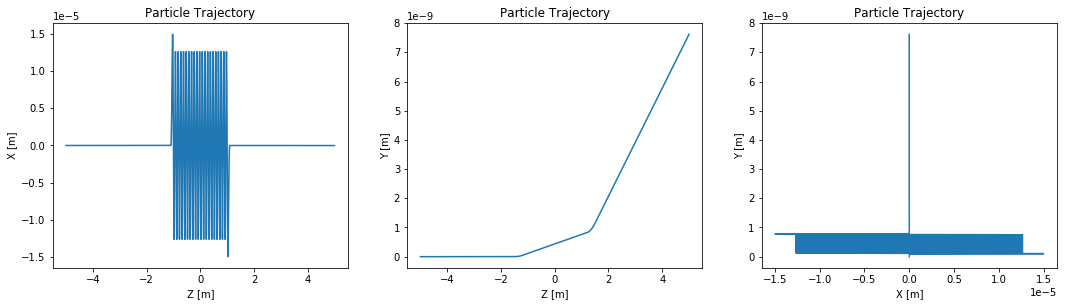

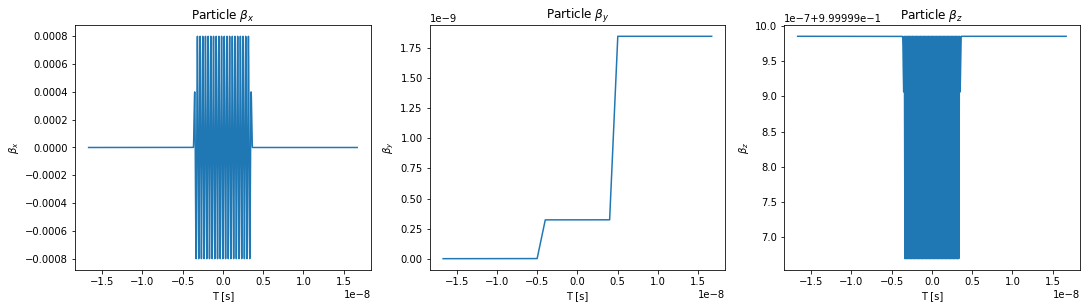

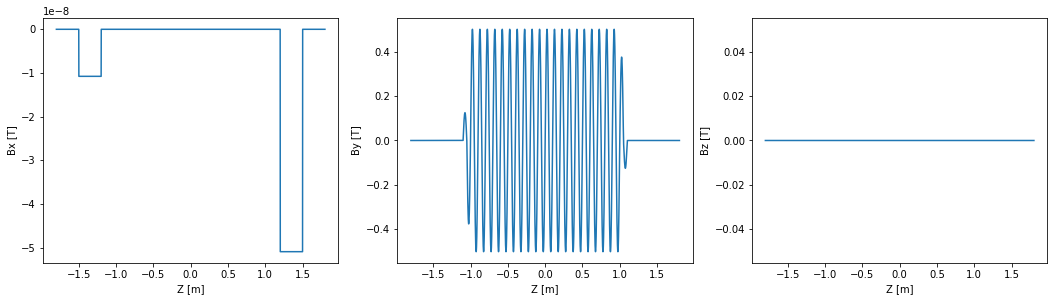

In [9]:
# Optimize field
t = field.b_y(osr, sr_info)

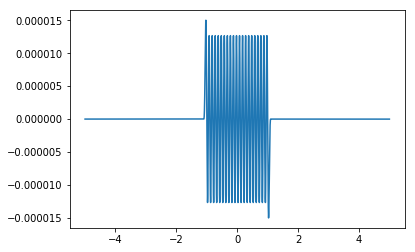

In [10]:
trajectory = osr.calculate_trajectory()
X = [item[1][0] for item in trajectory]
Y = [item[1][1] for item in trajectory]
Z = [item[1][2] for item in trajectory]
plt.figure(1)
plt.plot(Z, X)
#plt.savefig('trajectory-corrected.svg', bbox_inches='tight')
plt.show()

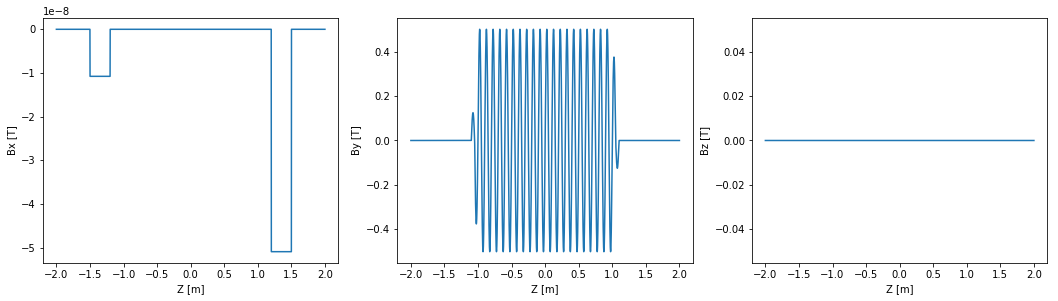

In [11]:
# Check to make sure field in sr object is what we see above
plots.plot_bfield(osr, mymin=-2, mymax=2) #, ofile='field-corrected.svg')